In [888]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [889]:
df=pd.read_csv('AviationData.csv',encoding='ISO-8859-1',low_memory=False)
df_names=pd.read_csv('USState_Codes.csv')
print(df_names.head())
print(df.head())

     US_State Abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA
         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  10/24/1948   
1  20001218X45447           Accident      LAX94LA336   7/19/1962   
2  20061025X01555           Accident      NYC07LA005   8/30/1974   
3  20001218X45448           Accident      LAX96LA321   6/19/1977   
4  20041105X01764           Accident      CHI79FA064    8/2/1979   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN        

In [890]:
df.shape

(88889, 31)

In [891]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [892]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [893]:
#check missing values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [894]:
#create a copy of the data so as to start altering the data
df1=df.copy(deep=True)

In [895]:
#check for unique values in all the columns
for column in df1:
 unique_values=df1[column].unique()
print(f"unique valuesin column'{column}'.'\n':{unique_values}",'\n')

unique valuesin column'Publication.Date'.'
':[nan '19-09-1996' '26-02-2007' ... '22-12-2022' '23-12-2022' '29-12-2022'] 



In [896]:
#remove spaces in the column names
df1.columns= df1.columns.str.strip()
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [897]:
#checking and removing duplicates
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

np.int64(0)

In [898]:
#Drop columns that will not be used for analysis and columns with lot of missing values
columns_to_be_dropped=['Latitude', 'Longitude', 'Airport.Code','Airport.Name','Schedule', 'Air.carrier','FAR.Description','Weather.Condition','Publication.Date']
df1=df1.drop(columns=columns_to_be_dropped)
#print(df1)


In [899]:
#remove inconsistency in the naming and fonts
def to_sentence_case(text):
    if isinstance(text, str):
        return text.capitalize()
    return text
df1 = df1.apply(lambda col: col.map(to_sentence_case))
print(df1)

             Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218x45444           Accident      Sea87la080  10/24/1948   
1      20001218x45447           Accident      Lax94la336   7/19/1962   
2      20061025x01555           Accident      Nyc07la005   8/30/1974   
3      20001218x45448           Accident      Lax96la321   6/19/1977   
4      20041105x01764           Accident      Chi79fa064    8/2/1979   
...               ...                ...             ...         ...   
88884     2.02212e+13           Accident      Era23la093  12/26/2022   
88885     2.02212e+13           Accident      Era23la095  12/26/2022   
88886     2.02212e+13           Accident      Wpr23la075  12/26/2022   
88887     2.02212e+13           Accident      Wpr23la076  12/26/2022   
88888     2.02212e+13           Accident      Era23la097  12/29/2022   

              Location        Country Injury.Severity Aircraft.damage  \
0      Moose creek, id  United states        Fatal(2)       De

In [900]:
df1.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Broad.phase.of.flight     27165
Report.Status              6384
dtype: int64

In [901]:
#replace the missing values of categorical data with the mode
mode_damage=df1['Aircraft.damage'].mode()[0]
mode_engine=df1['Engine.Type'].mode()[0]
mode_purpose=df1['Purpose.of.flight'].mode()[0]
mode_phase=df1['Broad.phase.of.flight'].mode()[0]
mode_status=df1['Report.Status'].mode()[0]
mode_category=df1['Aircraft.Category'].mode()[0]
#print(mode_damage)
#mode_damage=df1['Aircraft.damage'].fillna(mode_damage)
mode_damage=df1['Aircraft.damage'].fillna(mode_damage,inplace=True)
mode_engine=df1['Engine.Type'].fillna(mode_engine,inplace=True)
mode_purpose=df1['Purpose.of.flight'].fillna(mode_purpose,inplace=True)
mode_phase=df1['Broad.phase.of.flight'].fillna(mode_phase,inplace=True)
mode_status=df1['Report.Status'].fillna(mode_status,inplace=True)
mode_category=df1['Aircraft.Category'].fillna(mode_category,inplace=True)
#replace the missing values of non-categorical data with the mode
mean_engine=df1['Number.of.Engines'].mean()
mean_fatal=df1['Total.Fatal.Injuries'].mean()
mean_serious_=df1['Total.Serious.Injuries'].mean()
mean_minor=df1['Total.Minor.Injuries'].mean()
mean_uninjured=df1['Total.Uninjured'].mean()
mean_engine=df1['Number.of.Engines'].fillna(mean_engine,inplace=True)
mean_fatal=df1['Total.Fatal.Injuries'].fillna(mean_fatal,inplace=True)
mean_serious_=df1['Total.Serious.Injuries'].fillna(mean_serious_,inplace=True)
mean_minor=df1['Total.Minor.Injuries'].fillna(mean_minor,inplace=True)
mean_uninjured=df1['Total.Uninjured'].fillna(mean_uninjured,inplace=True)
print(df1)

             Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218x45444           Accident      Sea87la080  10/24/1948   
1      20001218x45447           Accident      Lax94la336   7/19/1962   
2      20061025x01555           Accident      Nyc07la005   8/30/1974   
3      20001218x45448           Accident      Lax96la321   6/19/1977   
4      20041105x01764           Accident      Chi79fa064    8/2/1979   
...               ...                ...             ...         ...   
88884     2.02212e+13           Accident      Era23la093  12/26/2022   
88885     2.02212e+13           Accident      Era23la095  12/26/2022   
88886     2.02212e+13           Accident      Wpr23la075  12/26/2022   
88887     2.02212e+13           Accident      Wpr23la076  12/26/2022   
88888     2.02212e+13           Accident      Era23la097  12/29/2022   

              Location        Country Injury.Severity Aircraft.damage  \
0      Moose creek, id  United states        Fatal(2)       De

C:\Users\pc\AppData\Local\Temp\ipykernel_6976\561552402.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mode_damage=df1['Aircraft.damage'].fillna(mode_damage,inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_6976\561552402.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [902]:
df1.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                    52
Country                    226
Injury.Severity           1000
Aircraft.damage              0
Aircraft.Category            0
Registration.Number       1382
Make                        63
Model                       92
Amateur.Built              102
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Broad.phase.of.flight        0
Report.Status                0
dtype: int64

In [903]:
#drop all the missing values

df1=df1.dropna()

In [904]:
df1.isna().sum()


Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [905]:
df1.shape

(86185, 22)

In [906]:
#Checking for unique values in the cleaned data
for column in df1:
 unique_values=df1[column].unique()
print(f"unique valuesin column'{column}'.'\n':{unique_values}",'\n')
df1.shape

unique valuesin column'Report.Status'.'
':['Probable cause' 'Factual' 'Foreign' ...
 'The pilot did not ensure adequate clearance from construction vehicles during taxi.'
 'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. contributing to the accident was the failure to properly secure the airplane with chocks.'
 'The pilot\x92s loss of control due to a wind gust during landing.'] 



(86185, 22)

<Axes: >

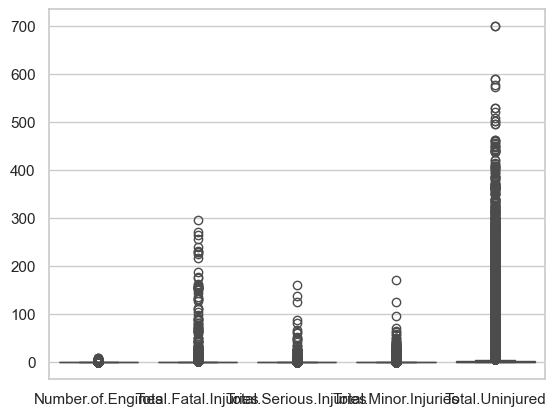

In [907]:
#Checking outliers
sns.boxplot(df1)

In [908]:
#sort the data with the aircraft category being Airplane and Purpose of the flight being business and private enterprises
df1=df1[df1['Aircraft.Category']=='Airplane']
purpose_alternatives=['Business','Personal']
df1=df1[df1['Purpose.of.flight'].isin (purpose_alternatives)]
df1.shape


(55345, 22)

    Group                                               Make  Total
4  Others  107.5 flying corporation177mf llc1977 colfer-c...  20214
2  Cessna                                             Cessna  17903
5   Piper                                              Piper  10849
0   Beech                                              Beech   3947
3  Mooney                                             Mooney   1217
1  Boeing                                             Boeing   1215


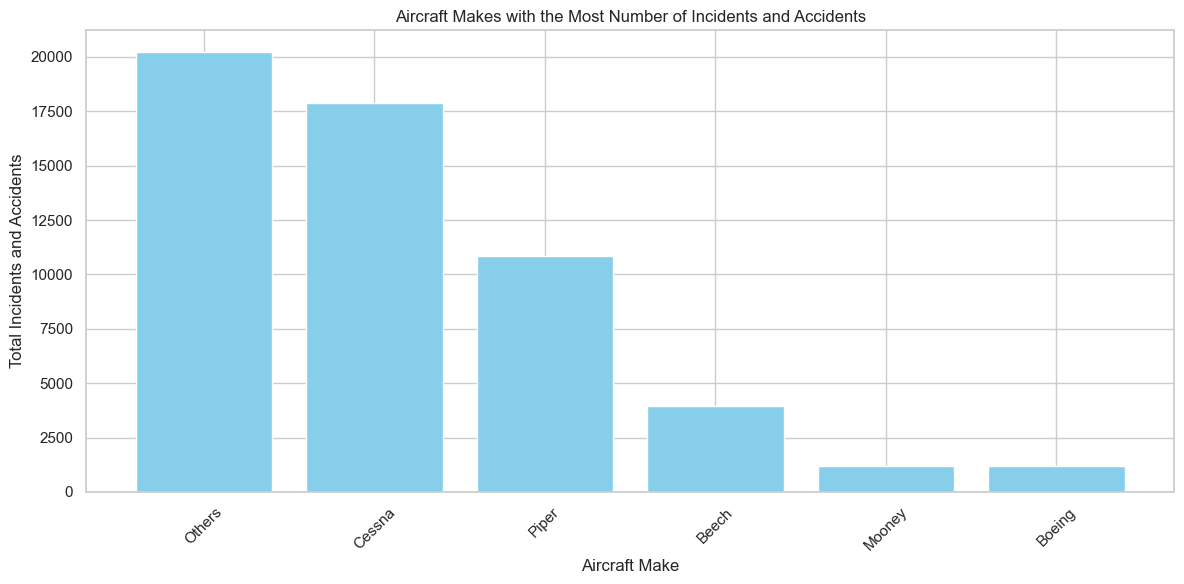

In [915]:
#Count the number of each investigation type per make
incident_accident_counts = df1.groupby(['Make', 'Investigation.Type']).size().unstack(fill_value=0)
# Calculate total incidents and accidents for each make
incident_accident_counts['Total'] = incident_accident_counts['Accident'] + incident_accident_counts['Incident']
# Group makes with fewer than 10 incidents and accidents into 'Others'
make_counts = incident_accident_counts['Total']
make_counts = make_counts.reset_index()
make_counts.columns = ['Make', 'Total']
# Identify makes with fewer than 1000 incidents
make_counts['Group'] = make_counts['Make'].apply(lambda x: x if make_counts[make_counts['Make'] == x]['Total'].values[0] >=1000 else 'Others')
# Aggregate counts for 'Others'
grouped_counts = make_counts.groupby('Group').sum().reset_index()
grouped_counts= grouped_counts.sort_values(by='Total', ascending=False)
print(grouped_counts)
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(grouped_counts['Group'], grouped_counts['Total'], color='skyblue')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Incidents and Accidents')
plt.title('Aircraft Makes with the Most Number of Incidents and Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot


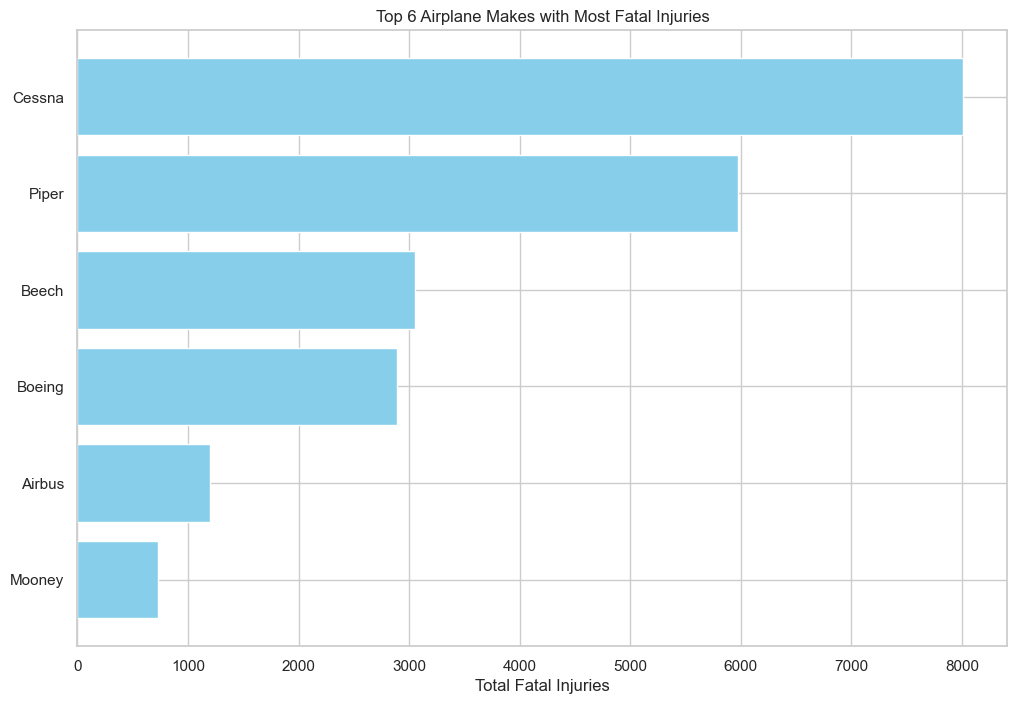

In [910]:
#fatalities_by_make = df1.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index
fatalities_by_make = df1.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()
# Sort by total fatalities in descending order and select the top 6
top_6_fatalities = fatalities_by_make.sort_values(by='Total.Fatal.Injuries', ascending=False).head(6)
top_6_fatalities = fatalities_by_make.sort_values(by='Total.Fatal.Injuries', ascending=False).head(6)
# Step 4: Visualize the Data
plt.figure(figsize=(12, 8))
plt.barh(top_6_fatalities['Make'], top_6_fatalities['Total.Fatal.Injuries'], color='skyblue')
plt.xlabel('Total Fatal Injuries')
plt.title('Top 6 Airplane Makes with Most Fatal Injuries')
plt.gca().invert_yaxis() # To display the highest number on top
plt.show()



                   Make  Total.Uninjured
634              Boeing    113666.810550
981              Cessna     27649.570182
122              Airbus     20095.000000
4343              Piper     16402.890946
3696  Mcdonnell douglas     10498.976319
123    Airbus industrie      9569.325440


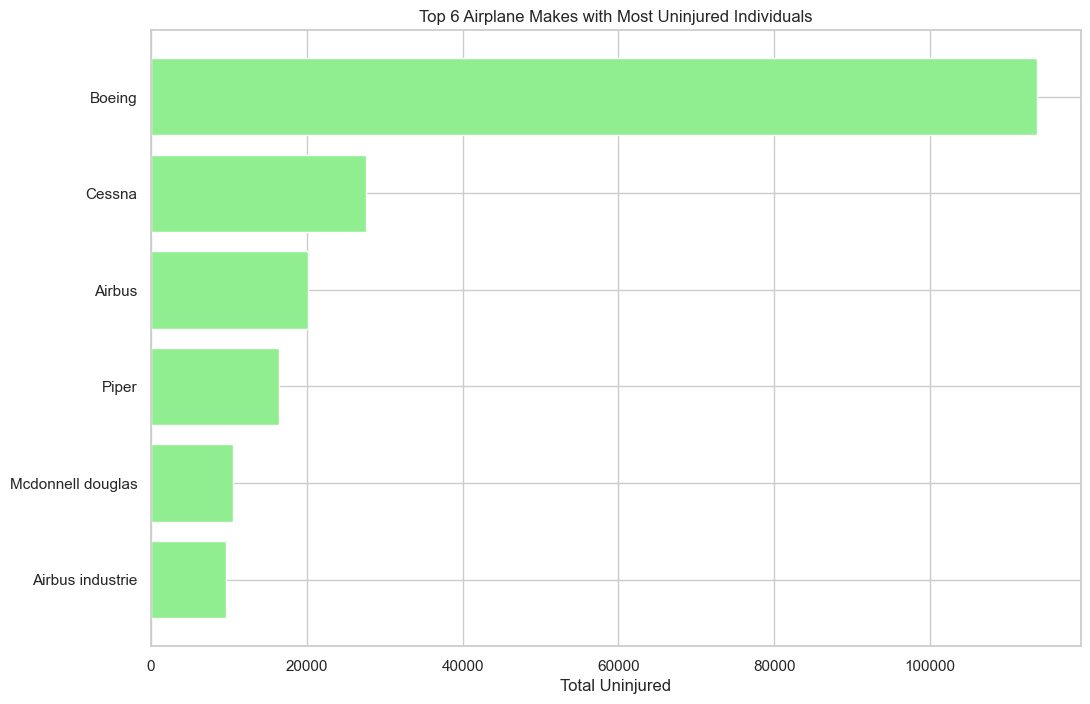

In [911]:
uninjured_by_make = df1.groupby('Make')['Total.Uninjured'].sum().reset_index()
# Sort by total uninjured in descending order and select the top 6
top_6_uninjured = uninjured_by_make.sort_values(by='Total.Uninjured', ascending=False).head(6)
print(top_6_uninjured)
#  Visualize the Data
plt.figure(figsize=(12, 8))
plt.barh(top_6_uninjured['Make'], top_6_uninjured['Total.Uninjured'], color='lightgreen')
plt.xlabel('Total Uninjured')
plt.title('Top 6 Airplane Makes with Most Uninjured Individuals')
plt.gca().invert_yaxis() # To display the highest number on top
plt.show()

                Make  Minor_Damage_Count
0             Boeing                 429
1             Cessna                 312
2             BOEING                 282
3              Piper                 165
4              Beech                 143
5  Mcdonnell Douglas                 143


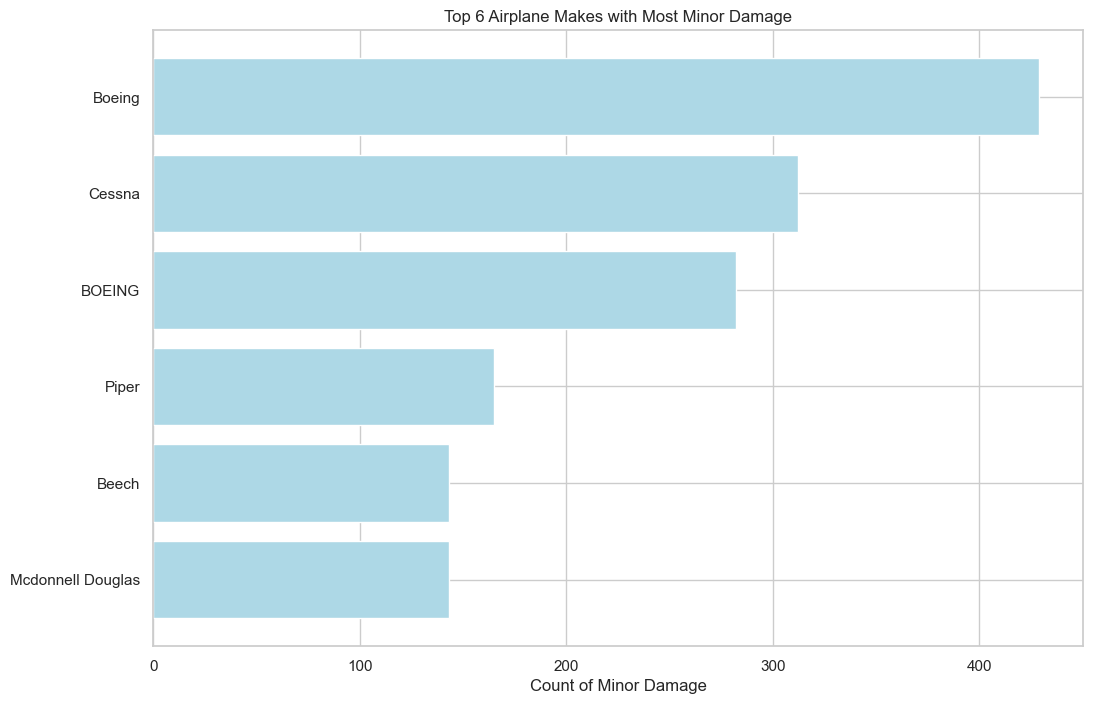

In [912]:
minor_damage_df = df[df['Aircraft.damage'] == 'Minor']
# Count occurrences of minor damage by make
minor_damage_counts = minor_damage_df['Make'].value_counts().reset_index()
minor_damage_counts.columns = ['Make', 'Minor_Damage_Count']
# Top 6 Makes with Most Minor Damage
top_6_minor_damage = minor_damage_counts.head(6)
print(top_6_minor_damage)
# plotting
plt.figure(figsize=(12, 8))
plt.barh(top_6_minor_damage['Make'], top_6_minor_damage['Minor_Damage_Count'], color='lightblue')
plt.xlabel('Count of Minor Damage')
plt.title('Top 6 Airplane Makes with Most Minor Damage')
plt.gca().invert_yaxis() #  display the highest count on top
plt.show()


       Model  Total.Uninjured
24       737      24463.00000
178      777       9215.00000
145      767       5596.32544
124      757       3807.32544
114  747-400       3552.00000


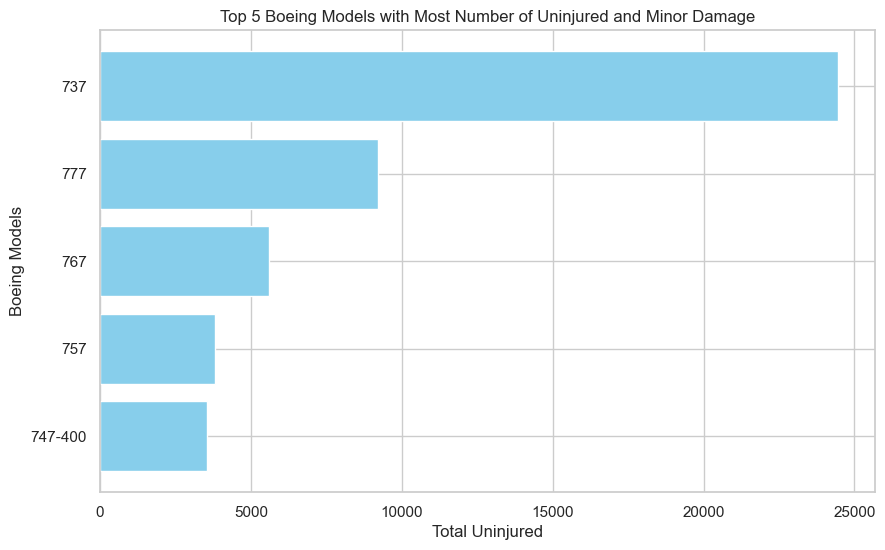

In [913]:
boeing_models = ['Boeing']#Narrow down to Boeing models  Filter the DataFrame for Boeing models
df_boeing = df1[df1['Make'].isin(boeing_models)].copy() 
# Convert 'Total.Uninjured' to numeric using .loc
df_boeing.loc[:, 'Total.Uninjured'] = pd.to_numeric(df_boeing['Total.Uninjured'], errors='coerce')
# Group by 'Model' and sum the 'Total.Uninjured'
model_summary = df_boeing.groupby('Model').agg({'Total.Uninjured': 'sum'}).reset_index()
# Sort by 'Total.Uninjured' in descending order and get the top 5 models
top_models = model_summary.sort_values(by='Total.Uninjured', ascending=False).head()
print(top_models)
#plotting
plt.figure(figsize=(10, 6))
plt.barh(top_models['Model'], top_models['Total.Uninjured'], color='skyblue')
plt.xlabel('Total Uninjured')
plt.ylabel('Boeing Models')
plt.title('Top 5 Boeing Models with Most Number of Uninjured and Minor Damage')
plt.gca().invert_yaxis() # To display the highest values on top
plt.show()


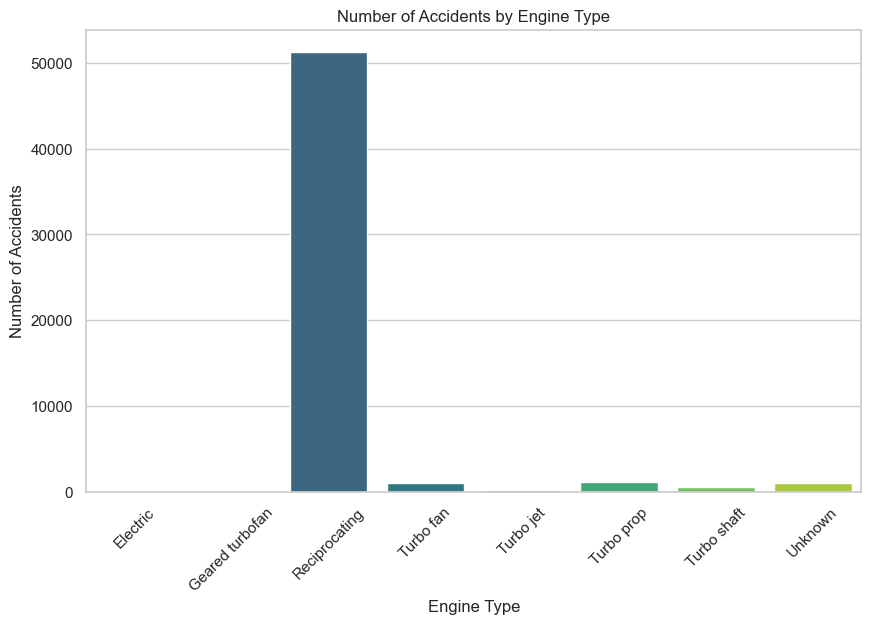

In [914]:
accidents_count = df1.groupby('Engine.Type').size().reset_index(name='Number of Accidents')
# Find the engine type with the least number of accidents
least_accidents_engine = accidents_count.loc[accidents_count['Number of Accidents'].idxmin()]
# Initialize the plot style
sns.set(style="whitegrid")
# Plot the number of accidents by engine type
plt.figure(figsize=(10, 6))
accidents_plot = sns.barplot(x='Engine.Type', y='Number of Accidents', data=accidents_count, hue='Engine.Type', palette='viridis', legend=False)
plt.title('Number of Accidents by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()